Error: 'net_value' column not found in ./result/backtest-20241024-150023.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-150551.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-154309.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-184247.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-184819.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-195930.account.csv
Error: 'net_value' column not found in ./result/backtest-20241024-201504.account.csv


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error: 'net_value' column not found in ./result/backtest-20241024-214815.account.csv


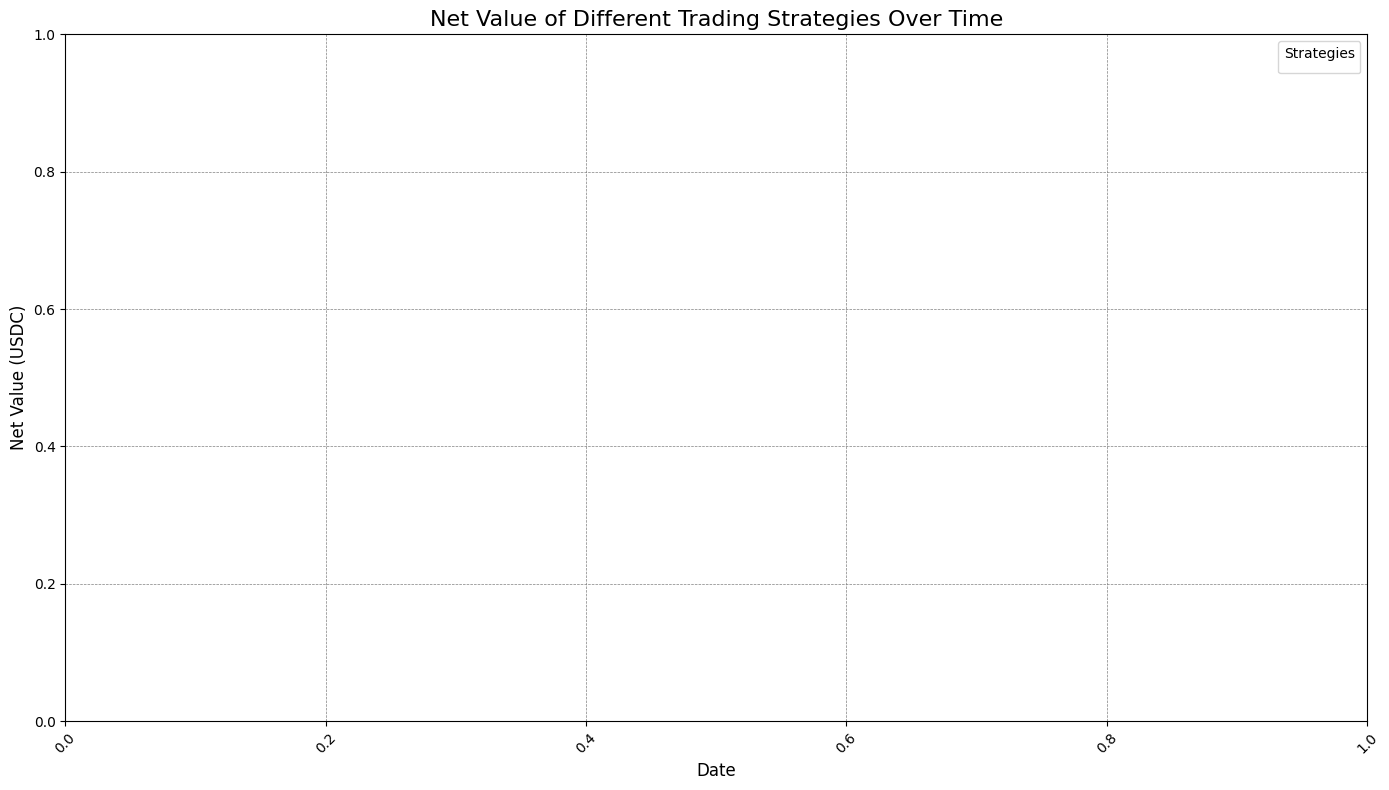

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for each strategy's results
file_paths = [
    "./result/backtest-20241024-150023.account.csv",
    "./result/backtest-20241024-150551.account.csv",
    "./result/backtest-20241024-154309.account.csv",
    "./result/backtest-20241024-184247.account.csv",
    "./result/backtest-20241024-184819.account.csv",
    "./result/backtest-20241024-195930.account.csv",
    "./result/backtest-20241024-201504.account.csv",
    "./result/backtest-20241024-214815.account.csv"
]

# Labels for each strategy line in the plot
strategy_labels = [
    "Strategy 1",
    "Strategy 2",
    "Strategy 3",
    "Strategy 4",
    "Strategy 5",
    "Strategy 6",
    "Strategy 7",
    "Strategy 8"
]

# Colors for each line
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f"
]

# Plot setup
plt.figure(figsize=(14, 8))

# Load each CSV file, process, and plot net value over time
for path, label, color in zip(file_paths, strategy_labels, colors):
    # Load CSV file, skip the first row and use the second row as header
    df = pd.read_csv(path, skiprows=[0, 1], parse_dates=[0], dayfirst=True, index_col=0)
    
    # Check if 'net_value' exists in the columns
    if "net_value" not in df.columns:
        print(f"Error: 'net_value' column not found in {path}")
        continue
    
    # Resample data to get the last entry of each day
    daily_net_value = df["net_value"].resample("D").last()
    
    # Plot the resampled daily net_value
    plt.plot(daily_net_value.index, daily_net_value, label=label, color=color, linewidth=1.5)

# Aesthetic adjustments for the plot
plt.title("Net Value of Different Trading Strategies Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Net Value (USDC)", fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=45)
plt.legend(title="Strategies", loc="upper right", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
